[![Open In Colab](https://img.shields.io/static/v1?message=Open%20in%20Colab&logo=googlecolab&label=%20&labelColor=5c5c5c&color=23c7a2&style=flat-square)](https://colab.research.google.com/github/einbandi/paradime/blob/master/notebooks/umap.ipynb)

Parametric UMAP
===============

In this example, we will set up a paraDime routine that is equivalent to a parametric implementation of UMAP. We will make use of the most important building blocks and methods of a [ParametricDR](../api/modules.rst#paradime.dr.ParametricDR) routine. The predefined [ParametricUMAP](../api/modules.rst#paradime.routines.ParametricUMAP) routine is defined in a similar way.

We start with some imports and define our dataset (MNIST handwritten image data):

In [1]:
import sys
sys.path.append("../../")

from sklearn import manifold
import torch
import torchvision

from paradime import dr as pddr
from paradime import relations as pdrel
from paradime import transforms as pdtf
from paradime import loss as pdloss
from paradime import utils as pdutils

mnist = torchvision.datasets.MNIST(
    '../../data',
    train=True,
    download=True,
)
mnist_data = mnist.data.reshape(-1, 28*28) / 255.
num_items = 5000

In [2]:
from umap import ParametricUMAP
import tensorflow as tf

encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=28*28),
    tf.keras.layers.Dense(units=100, activation="softplus"),
    tf.keras.layers.Dense(units=50, activation="softplus"),
    tf.keras.layers.Dense(units=2)
])

In [7]:
pumap = ParametricUMAP(
    encoder=encoder,
    batch_size=500,
    loss_report_frequency=10,
    n_training_epochs=1,
)

In [8]:
pumap.fit(mnist_data[:num_items])

Epoch 1/10
3224/3224 [==============================] - 32s 10ms/step - loss: 0.1639
Epoch 2/10
3224/3224 [==============================] - 32s 10ms/step - loss: 0.1532
Epoch 3/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1493
Epoch 4/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1469
Epoch 5/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1448
Epoch 6/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1437
Epoch 7/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1434
Epoch 8/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1427
Epoch 9/10
3224/3224 [==============================] - 31s 10ms/step - loss: 0.1420
Epoch 10/10
3224/3224 [==============================] - 32s 10ms/step - loss: 0.1420


ParametricUMAP(batch_size=500, dims=[784], encoder=<keras.engine.sequential.Sequential object at 0x000001B3CC042160>, optimizer=<keras.optimizers.optimizer_v2.adam.Adam object at 0x000001B5B419E9A0>)

<AxesSubplot:>

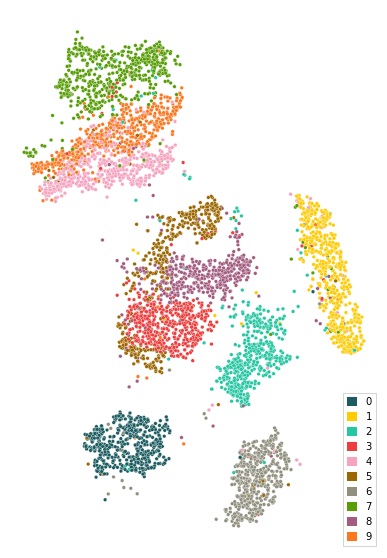

In [13]:
pdutils.plotting.scatterplot(
    pumap.transform(mnist_data[:num_items]),
    labels=mnist.targets[:num_items],
)

In [63]:
import paradime.routines

pdpumap = paradime.routines.ParametricUMAP(
    dataset=mnist_data[:num_items],
    batch_size=100,
    epochs=300,
    negative_sampling_rate=10,
    verbose=True,
    use_cuda=True,
    learning_rate=0.003,
)
for p in pdpumap.model.parameters():
    p.register_hook(lambda grad: torch.clamp(grad, -4., 4.))

2022-09-13 13:03:51,475: Registering dataset.


In [64]:
pdpumap.train()

2022-09-13 13:03:54,117: Computing global relations 'rel'.
2022-09-13 13:03:54,117: Indexing nearest neighbors.
2022-09-13 13:03:54,354: Calculating probabilities.
2022-09-13 13:03:57,322: Adding entry 'spectral' to dataset.
2022-09-13 13:03:57,324: Beginning training phase 'spectral_init'.
2022-09-13 13:03:57,535: Loss after epoch 0: 381.38050293922424
2022-09-13 13:03:58,117: Beginning training phase 'embedding'.
2022-09-13 13:03:58,288: Loss after epoch 0: 70.01715087890625
2022-09-13 13:03:59,153: Loss after epoch 5: 51.7180290222168
2022-09-13 13:04:00,054: Loss after epoch 10: 6.908432841300964
2022-09-13 13:04:01,008: Loss after epoch 15: 2.6450926661491394
2022-09-13 13:04:01,962: Loss after epoch 20: 2.396623134613037
2022-09-13 13:04:02,963: Loss after epoch 25: 2.2622013092041016
2022-09-13 13:04:03,941: Loss after epoch 30: 2.1871562600135803
2022-09-13 13:04:04,988: Loss after epoch 35: 1.6728678345680237
2022-09-13 13:04:05,962: Loss after epoch 40: 1.2717573791742325
202

<AxesSubplot:>

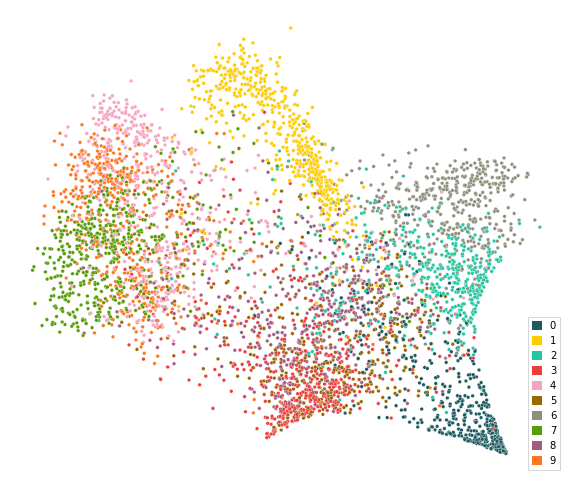

In [65]:
pdutils.plotting.scatterplot(
    pdpumap.apply(mnist_data[:num_items]),
    labels=mnist.targets[:num_items],
)

In [53]:
pdpumap.model.layers[-1].weight.grad.max()

tensor(0.0236, device='cuda:0')